<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/Assignment12/S12_Nagaraj_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install
#from pypi
#!pip install albumentations
#latest version directly from github before released to pypi
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-skrbhnpf
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-skrbhnpf
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=8c9ba56849a758de605710ec1e892bfeb09a6494b367f43a25626419b1027b8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ifu4rsh/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [3]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4.0/Phase1/Session12')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

fatal: destination path 'IMagenet' already exists and is not an empty directory.
test  train  val  wnids.txt  words.txt


In [4]:
from models import resnet, my_model
from utils import my_trainer, lr_finder, nn_analysis, tiny_imagenet_data_provider as tdp

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
import torch
path = 'IMagenet/tiny-imagenet-200/train'
path_val = 'IMagenet/tiny-imagenet-200/val'

train, test = tdp.get_train_test_data(path)

train_loader = torch.utils.data.DataLoader(train, batch_size=128,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=100,
                                         shuffle=False, num_workers=2)

train samples


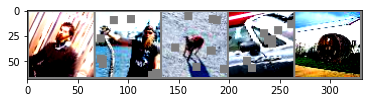

In [6]:
print('train samples')
tdp.display(train_loader)

test samples


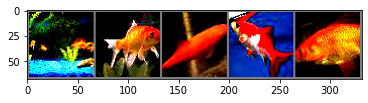

In [7]:
print('test samples')
tdp.display(test_loader)

In [11]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet.ResNet18(200).to(device)
#model = my_model.Net().to(device)

cuda


In [0]:
import torch.nn as nn
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=1e-7,  weight_decay=1e-2)
criterion = nn.CrossEntropyLoss()


Learning rate search finished. See the graph with {finder_name}.plot()


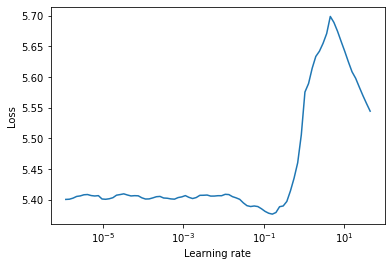

In [13]:
lrfinder = lr_finder.LRFinder(model, optimizer, criterion, device)
lrfinder.range_test(train_loader, end_lr=100, num_iter=100)
lrfinder.plot()
lrfinder.reset()

In [14]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [15]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

train_losses = []
test_losses = []
train_acc = []
test_acc = []
model = resnet.ResNet18(200).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.9, nesterov=True)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)

EPOCHS = 50

my_trainer.run(model, device, train_loader, test_loader, optimizer, scheduler, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.417637348175049 Batch_id=546 Accuracy=3.46: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0444, Accuracy: 2365/30000 (7.88%)

EPOCH: 1


Loss=4.000365734100342 Batch_id=546 Accuracy=10.51: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 4292/30000 (14.31%)

EPOCH: 2


Loss=3.638493776321411 Batch_id=546 Accuracy=17.79: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Accuracy: 5940/30000 (19.80%)

EPOCH: 3


Loss=3.3909709453582764 Batch_id=546 Accuracy=24.34: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 8051/30000 (26.84%)

EPOCH: 4


Loss=2.873732328414917 Batch_id=546 Accuracy=29.51: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 8540/30000 (28.47%)

EPOCH: 5


  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Accuracy: 9876/30000 (32.92%)

EPOCH: 6


Loss=2.857125997543335 Batch_id=546 Accuracy=37.93: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 11571/30000 (38.57%)

EPOCH: 7


Loss=2.1918463706970215 Batch_id=546 Accuracy=41.03: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 11970/30000 (39.90%)

EPOCH: 8


Loss=2.6144044399261475 Batch_id=546 Accuracy=44.30: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 12378/30000 (41.26%)

EPOCH: 9


Loss=2.0092928409576416 Batch_id=546 Accuracy=47.15: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 12623/30000 (42.08%)

EPOCH: 10


Loss=1.819449543952942 Batch_id=546 Accuracy=49.80: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 13203/30000 (44.01%)

EPOCH: 11


Loss=1.9394344091415405 Batch_id=546 Accuracy=52.21: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 13436/30000 (44.79%)

EPOCH: 12


Loss=1.6125105619430542 Batch_id=546 Accuracy=54.75: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 14353/30000 (47.84%)

EPOCH: 13


Loss=1.8775213956832886 Batch_id=546 Accuracy=56.71: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 14271/30000 (47.57%)

EPOCH: 14


Loss=1.407658576965332 Batch_id=546 Accuracy=58.85: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 14556/30000 (48.52%)

EPOCH: 15


Loss=1.0644118785858154 Batch_id=546 Accuracy=60.91: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 14863/30000 (49.54%)

EPOCH: 16


Loss=1.2515019178390503 Batch_id=546 Accuracy=62.98: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 14976/30000 (49.92%)

EPOCH: 17


Loss=1.4330557584762573 Batch_id=546 Accuracy=64.83: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 14764/30000 (49.21%)

EPOCH: 18


Loss=1.1988916397094727 Batch_id=546 Accuracy=67.16: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 14829/30000 (49.43%)

EPOCH: 19


Loss=1.3329886198043823 Batch_id=546 Accuracy=68.60: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 14783/30000 (49.28%)

EPOCH: 20


Loss=0.5949701070785522 Batch_id=546 Accuracy=79.36: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 16543/30000 (55.14%)

EPOCH: 21


Loss=0.5689694285392761 Batch_id=546 Accuracy=82.02: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 16679/30000 (55.60%)

EPOCH: 22


Loss=0.75897616147995 Batch_id=546 Accuracy=83.14: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 16656/30000 (55.52%)

EPOCH: 23


Loss=0.5065891146659851 Batch_id=546 Accuracy=84.26: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16672/30000 (55.57%)

EPOCH: 24


Loss=0.364166259765625 Batch_id=546 Accuracy=85.66: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16720/30000 (55.73%)

EPOCH: 25


Loss=0.593197226524353 Batch_id=546 Accuracy=85.66: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16711/30000 (55.70%)

EPOCH: 26


Loss=0.5415961146354675 Batch_id=546 Accuracy=85.89: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16702/30000 (55.67%)

EPOCH: 27


Loss=0.5963459610939026 Batch_id=546 Accuracy=85.80: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16718/30000 (55.73%)

EPOCH: 28


Loss=0.6241326332092285 Batch_id=546 Accuracy=85.90: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16710/30000 (55.70%)

EPOCH: 29


Loss=0.48964187502861023 Batch_id=546 Accuracy=85.65: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16733/30000 (55.78%)

EPOCH: 30


Loss=0.3975226879119873 Batch_id=546 Accuracy=85.86: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16702/30000 (55.67%)

EPOCH: 31


Loss=0.4265720248222351 Batch_id=546 Accuracy=85.79: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16718/30000 (55.73%)

EPOCH: 32


Loss=0.49825599789619446 Batch_id=546 Accuracy=85.90: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16724/30000 (55.75%)

EPOCH: 33


Loss=0.559520423412323 Batch_id=546 Accuracy=85.97: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16732/30000 (55.77%)

EPOCH: 34


Loss=0.487965852022171 Batch_id=546 Accuracy=85.93: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16704/30000 (55.68%)

EPOCH: 35


Loss=0.44302865862846375 Batch_id=546 Accuracy=86.05: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16721/30000 (55.74%)

EPOCH: 36


Loss=0.5732876062393188 Batch_id=546 Accuracy=85.96: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16656/30000 (55.52%)

EPOCH: 37


Loss=0.505611777305603 Batch_id=546 Accuracy=86.01: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16724/30000 (55.75%)

EPOCH: 38


Loss=0.4655829966068268 Batch_id=546 Accuracy=85.99: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16710/30000 (55.70%)

EPOCH: 39


Loss=0.5233147740364075 Batch_id=546 Accuracy=85.97: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16705/30000 (55.68%)

EPOCH: 40


Loss=0.7112938761711121 Batch_id=546 Accuracy=85.97: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16717/30000 (55.72%)

EPOCH: 41


Loss=0.41948267817497253 Batch_id=546 Accuracy=86.01: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16687/30000 (55.62%)

EPOCH: 42


Loss=0.8273392915725708 Batch_id=546 Accuracy=85.85: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16714/30000 (55.71%)

EPOCH: 43


Loss=0.544994056224823 Batch_id=546 Accuracy=86.05: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16704/30000 (55.68%)

EPOCH: 44


Loss=0.6553830504417419 Batch_id=546 Accuracy=85.93: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16742/30000 (55.81%)

EPOCH: 45


Loss=0.5076097846031189 Batch_id=546 Accuracy=85.88: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 16730/30000 (55.77%)

EPOCH: 46


Loss=0.5478986501693726 Batch_id=546 Accuracy=86.05: 100%|██████████| 547/547 [02:14<00:00,  4.07it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16726/30000 (55.75%)

EPOCH: 47


Loss=0.5365328788757324 Batch_id=546 Accuracy=85.83: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 16707/30000 (55.69%)

EPOCH: 48


Loss=0.7865975499153137 Batch_id=546 Accuracy=85.94: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 16719/30000 (55.73%)

EPOCH: 49


Loss=0.660255491733551 Batch_id=546 Accuracy=85.89: 100%|██████████| 547/547 [02:14<00:00,  4.06it/s]



Test set: Average loss: 0.0201, Accuracy: 16724/30000 (55.75%)



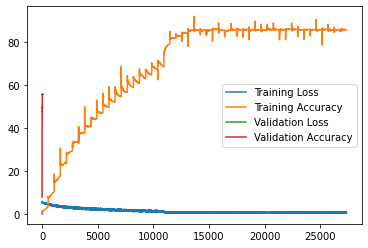

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
my_trainer.plot(train_losses, train_acc, test_losses, test_acc)

In [0]:
analyzer = nn_analysis.NN_Analysis(model, test_loader, device)
images, target_list, predicted_list = analyzer.find_misclassified(model, test_loader, device, num_imgs=25)
analyzer.plot_misclassifieds(images, target_list, predicted_list, num_imgs=25)